In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
pd.set_option('display.max_columns', None)
df=pd.read_csv("terrorism.csv",index_col=0)
df.head()

,Year,Month,Day,Extended,Country,Region,Prov_state,City,Specificity,Vicinity,Doubt Error,Multiple_People,Success,Suicide,Attacktype,Targtype,Target,Natlty,Group Name,Guncertain,Individual,N_Preps,N_Prepscap,Weapontype,Nkill,Nkillus,Nkillter,N_wounds,N_woundus,N_woundtheir,Property,Is_Hostage_kid
1,1970,0,0,0,Mexico,North America,Federal,Mexico city,1,0,0,0,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",Belgium,23rd of September Communist League,0,0,7,0,Unknown,0,0,0,0,0,0,0,1
2,1970,1,0,0,Philippines,Southeast Asia,Tarlac,Unknown,4,0,0,0,1,0,Assassination,Journalists & Media,Employee,United States,Unknown,0,0,99,0,Unknown,1,0,0,0,0,0,0,0
3,1970,1,0,0,Greece,Western Europe,Attica,Athens,1,0,0,0,1,0,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,United States,Unknown,0,0,99,0,Explosives,0,0,0,0,0,0,1,0
4,1970,1,0,0,Japan,East Asia,Fukouka,Fukouka,1,0,0,0,1,0,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,United States,Unknown,0,0,99,0,Incendiary,0,0,0,0,0,0,1,0
5,1970,1,1,0,United States,North America,Illinois,Cairo,1,0,0,0,1,0,Armed Assault,Police,Cairo Police Headquarters,United States,Black Nationalists,0,0,99,99,Firearms,0,0,0,0,0,0,1,0


<AxesSubplot:>

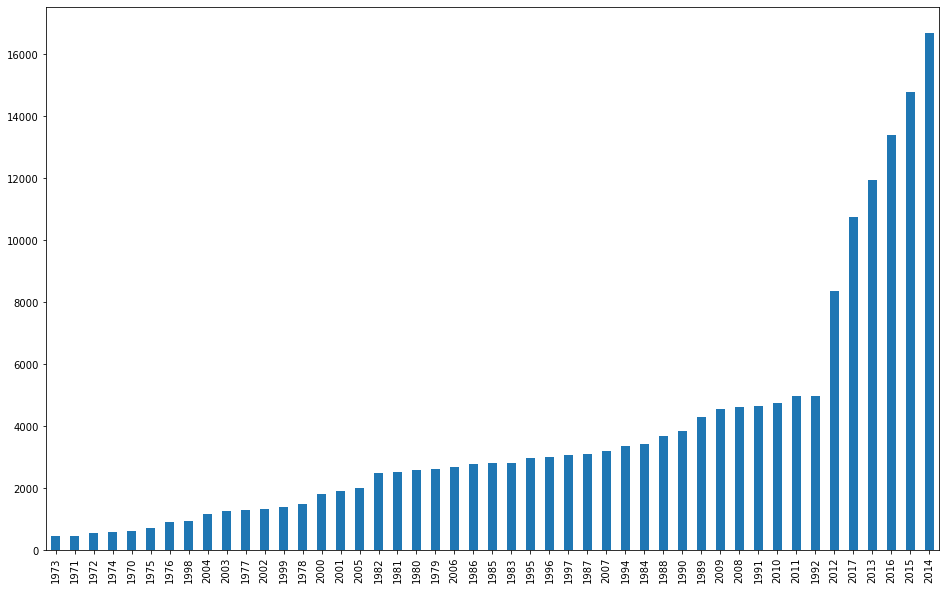

In [11]:
df.Year.value_counts(ascending=True).plot(kind="bar",figsize=(16,10))

<AxesSubplot:>

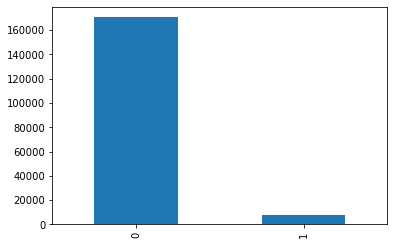

In [13]:
df.Extended.value_counts().plot(kind="bar")

In [16]:
df.Country.value_counts(ascending=True)

New Hebrides               1
Vatican City               1
Antigua and Barbuda        1
South Vietnam              1
St. Lucia                  1
                       ...  
Colombia                8264
Afghanistan            11850
India                  11906
Pakistan               14279
Iraq                   24553
Name: Country, Length: 205, dtype: int64

<AxesSubplot:>

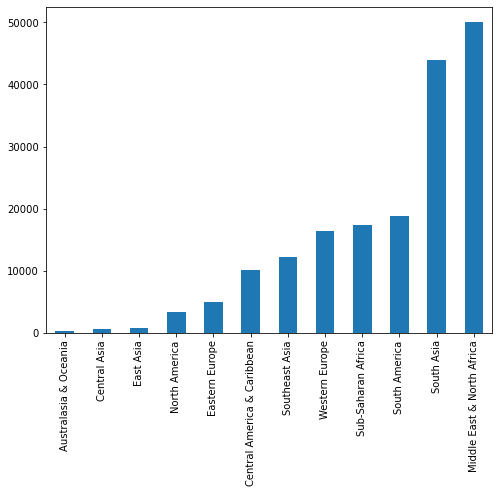

In [35]:
df.Region.value_counts(ascending=True).plot(kind="bar",figsize=(8,6))

In [19]:
country_region=df.groupby("Region")["Country"].value_counts()

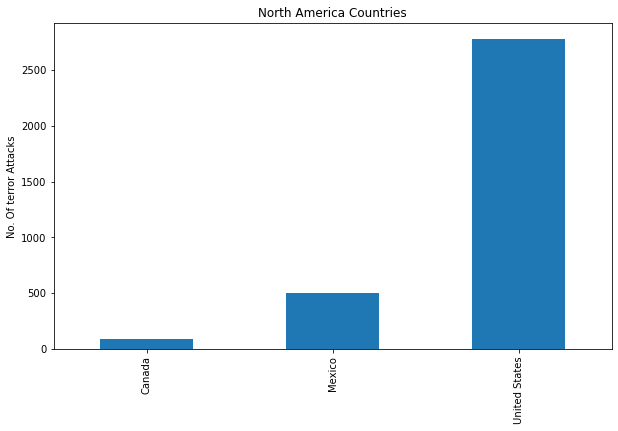

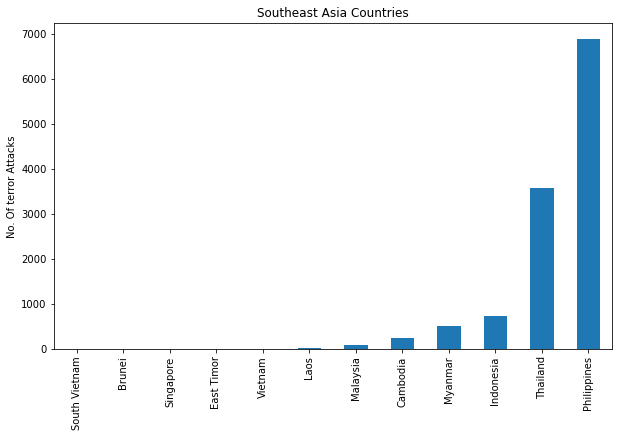

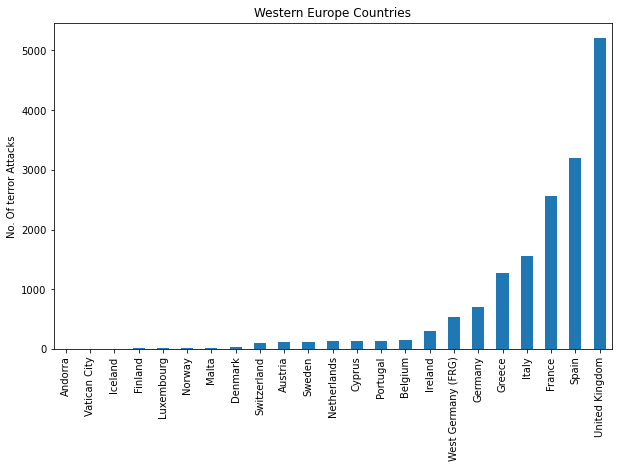

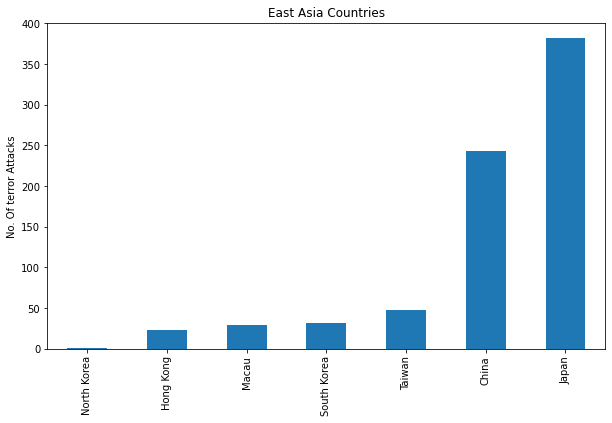

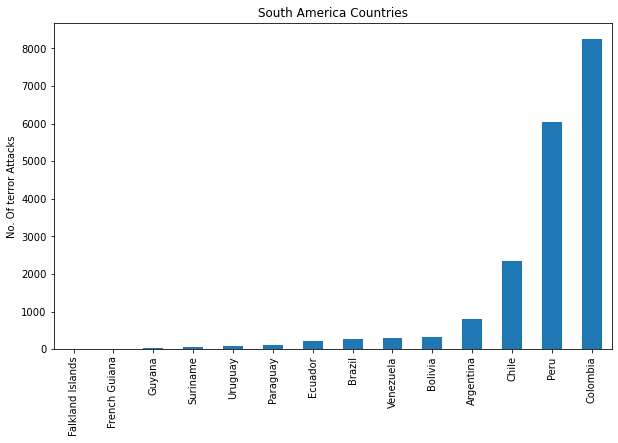

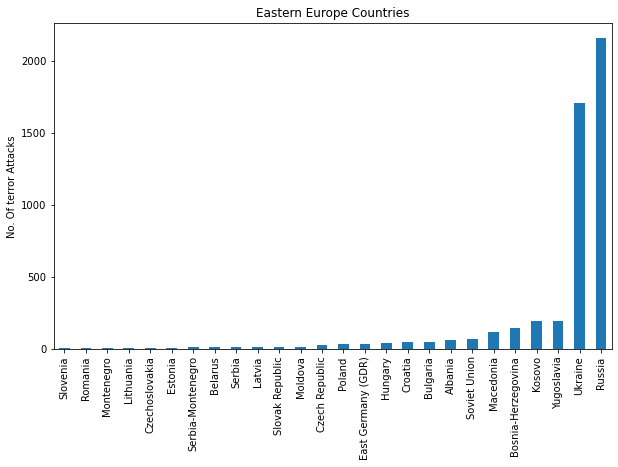

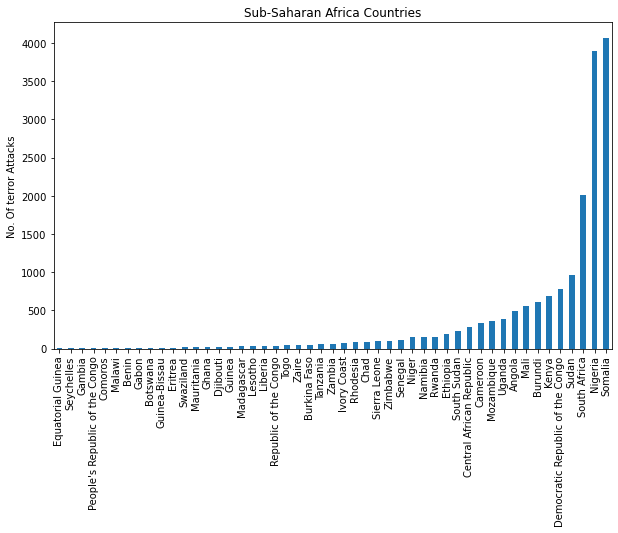

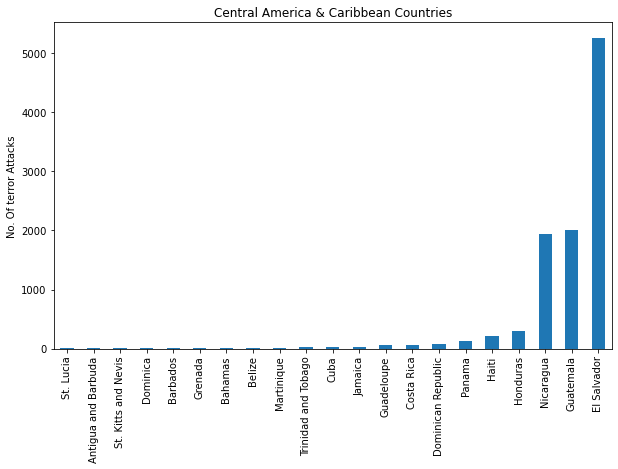

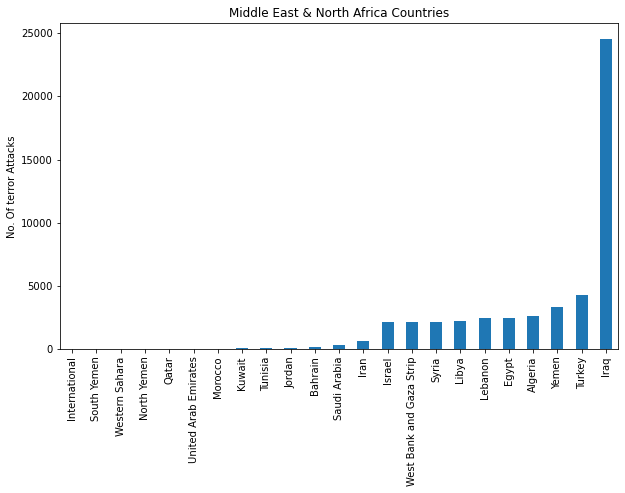

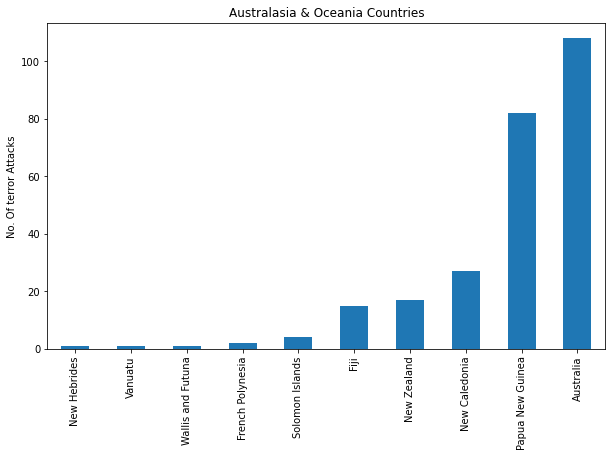

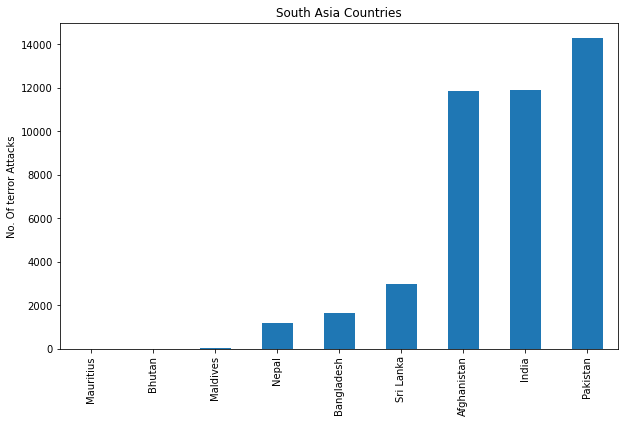

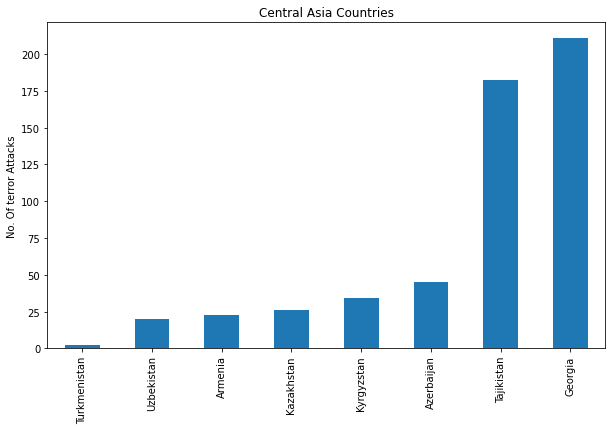

In [37]:
for feature in df.Region.unique():
    df[df.Region==feature].Country.value_counts(ascending=True).plot(kind="bar",figsize=(10,6))
    plt.title(feature+" Countries")
    plt.ylabel("No. Of terror Attacks")
    plt.show()

In [53]:
df.Success.value_counts(),df.Multiple_People.value_counts()

(1    159361
 0     19357
 Name: Success, dtype: int64,
 0    153927
 1     24791
 Name: Multiple_People, dtype: int64)

In [44]:
df["Success"].corr(df["Multiple_People"])

0.019435829154914312

In [ ]:
import seaborn as sns

In [120]:
success=df["Success"].value_counts(sort=False)
MP=df["Multiple_People"].value_counts(sort=False)
suicide=df["Suicide"].value_counts(sort=False)

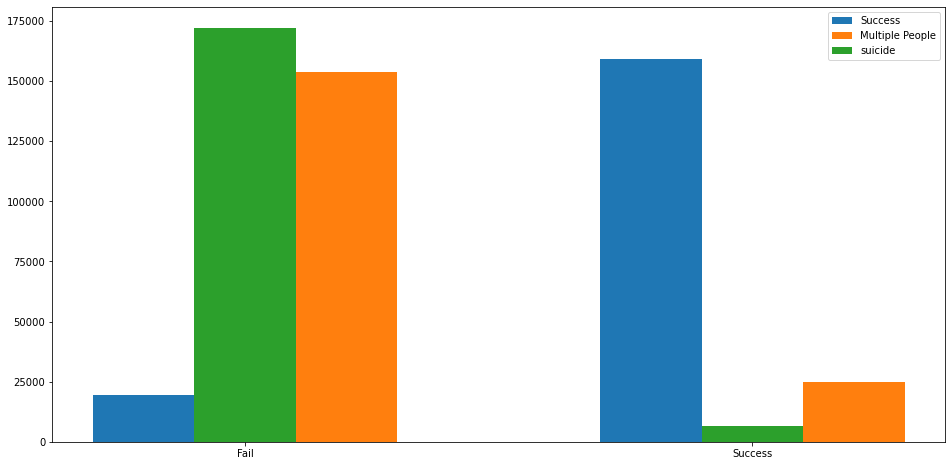

In [149]:
X = [0,1]
suc = [success.values[0],success.values[1]]
mul = [MP.values[0],MP.values[1]]
sus=[suicide.values[0],suicide.values[1]]  
X_axis = np.arange(len(X))
plt.figure(figsize=(16,8))
plt.bar(X_axis - 0.2, suc, 0.2, label = 'Success')
plt.bar(X_axis + 0.2, mul, 0.2, label = 'Multiple People')
plt.bar(X_axis ,sus,0.2,label='suicide')

  
plt.xticks(X_axis,["Fail","Success"])

plt.legend()
plt.show()

Text(0.5, 1.0, 'Attack Type')

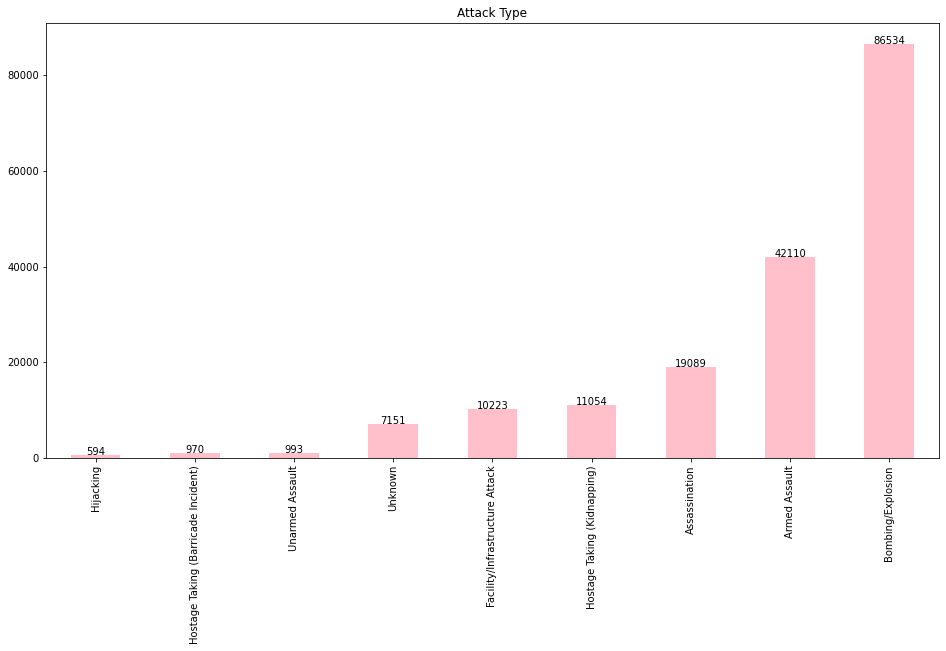

In [158]:
df.Attacktype.value_counts(ascending=True).plot(kind="bar",color='pink',figsize=(16,8))
labels=df.Attacktype.value_counts(ascending=True).values
for i in range(len(labels)):
    plt.text(i,labels[i],labels[i],ha="center")
plt.title("Attack Type")

Text(0.5, 1.0, 'Attack Type')

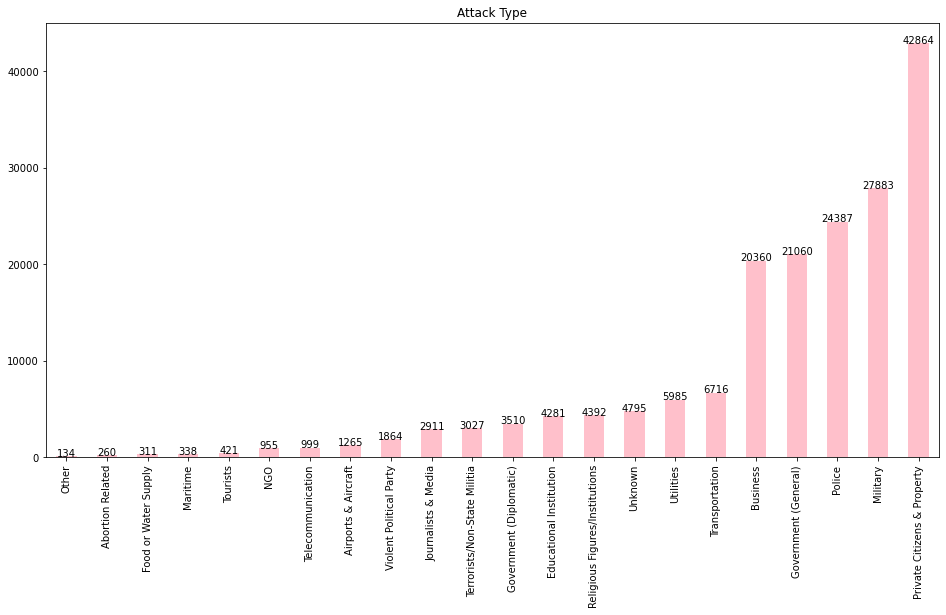

In [162]:
df.Targtype.value_counts(ascending=True).plot(kind="bar",color='pink',figsize=(16,8))
labels=df.Targtype.value_counts(ascending=True).values
for i in range(len(labels)):
    plt.text(i,labels[i],labels[i],ha="center")
plt.title("Attack Type")

In [163]:
df.columns

Index(['Year', 'Month', 'Day', 'Extended', 'Country', 'Region', 'Prov_state',
       'City', 'Specificity', 'Vicinity', 'Doubt Error', 'Multiple_People',
       'Success', 'Suicide', 'Attacktype', 'Targtype', 'Target', 'Natlty',
       'Group Name', 'Guncertain', 'Individual', 'N_Preps', 'N_Prepscap',
       ' Weapontype', 'Nkill', 'Nkillus', 'Nkillter', 'N_wounds', 'N_woundus',
       'N_woundtheir', 'Property', 'Is_Hostage_kid'],
      dtype='object')

<AxesSubplot:>

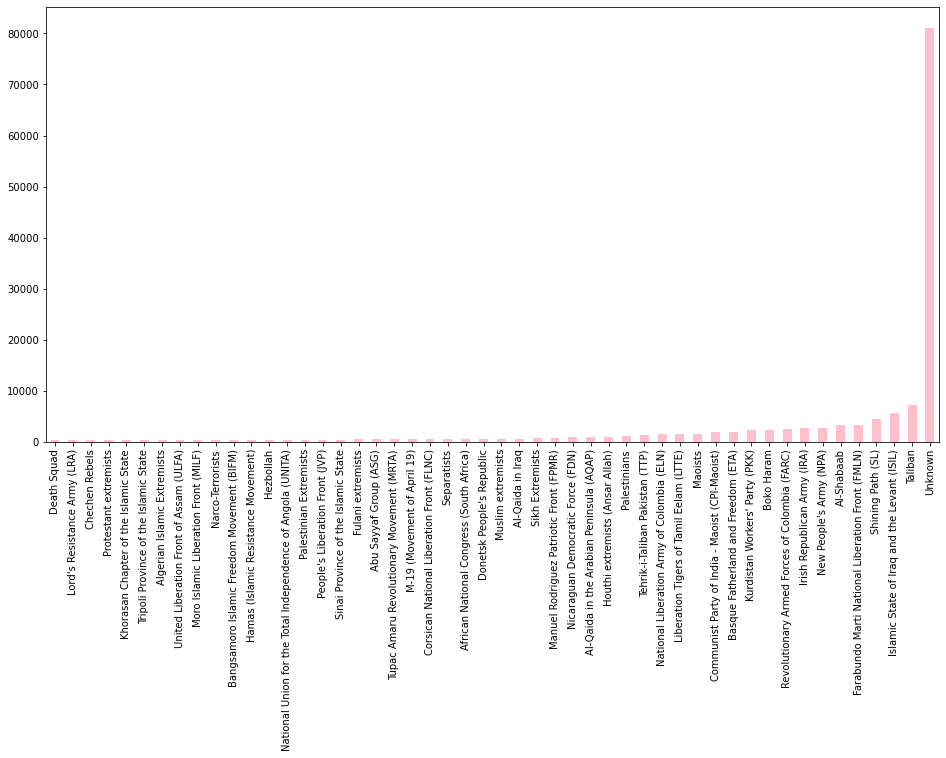

In [177]:
df["Group Name"].value_counts()[:50].sort_values().plot(kind="bar",color='pink',figsize=(16,8))

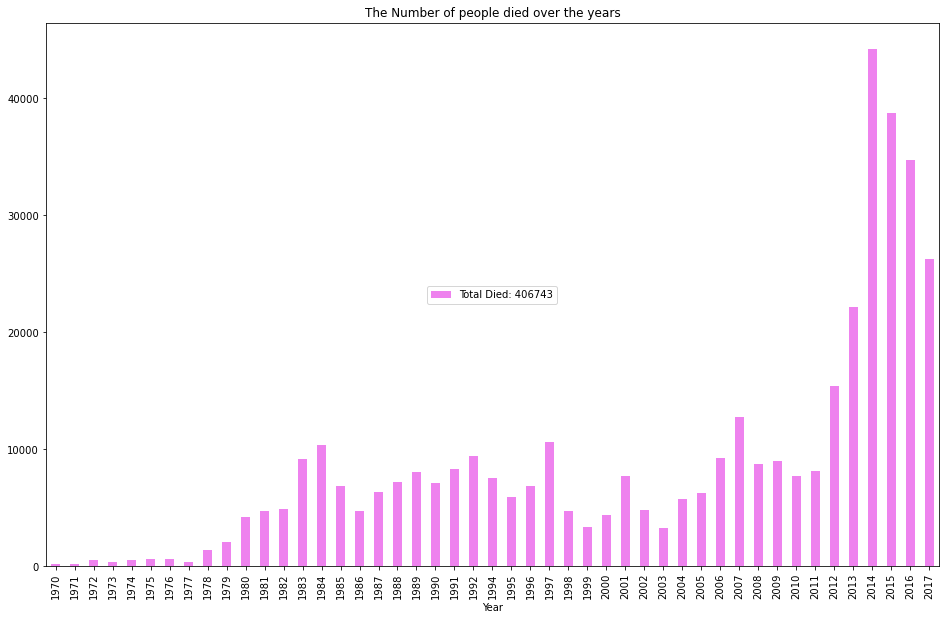

In [203]:
df.groupby(["Year"])["Nkill"].sum().plot(kind="bar",figsize=(16,10),color="violet")
plt.title("The Number of people died over the years")
plt.legend(["Total Died: {}".format(df.Nkill.sum())],loc="center")
plt.show()

In [205]:
df.Property.replace(9,0,inplace=True)

([<matplotlib.axis.XTick at 0x20212277190>,
 [Text(0, 0, 'Not Kid'), Text(1, 0, 'Kid')])

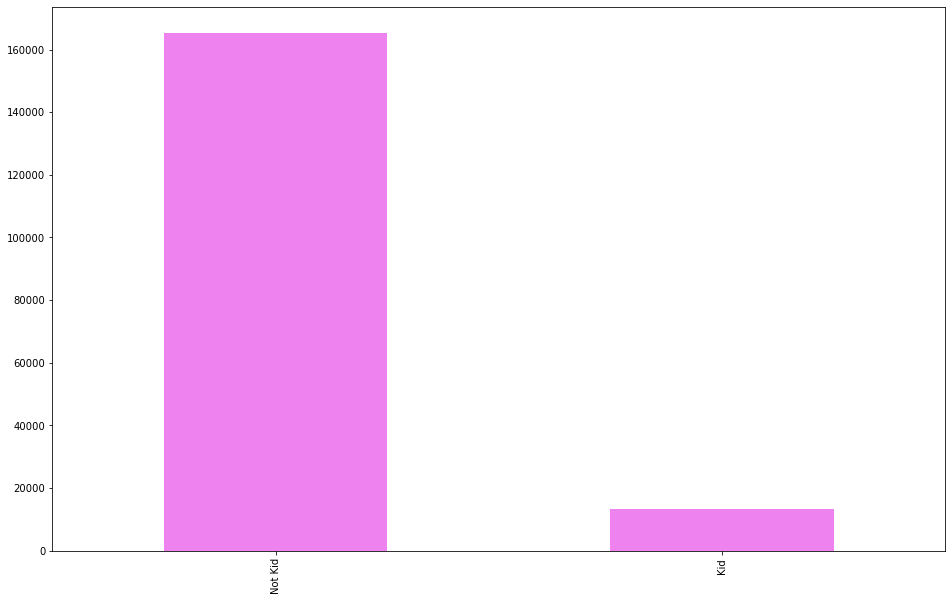

In [215]:
df.Is_Hostage_kid.value_counts().plot(kind="bar",figsize=(16,10),color="violet")
plt.xticks([0,1],["Not Kid","Kid"])

In [226]:
df[df.Is_Hostage_kid==1]["Group Name"].value_counts()[:15]

Unknown                                             3903
Taliban                                              778
Islamic State of Iraq and the Levant (ISIL)          641
Revolutionary Armed Forces of Colombia (FARC)        391
Communist Party of India - Maoist (CPI-Maoist)       382
National Liberation Army of Colombia (ELN)           376
Al-Shabaab                                           360
New People's Army (NPA)                              305
Maoists                                              302
Boko Haram                                           204
Abu Sayyaf Group (ASG)                               188
Farabundo Marti National Liberation Front (FMLN)     164
Tehrik-i-Taliban Pakistan (TTP)                      159
Shining Path (SL)                                    158
Kurdistan Workers' Party (PKK)                       156
Name: Group Name, dtype: int64

In Kidnapping Cases Most of the time kids are targeted 

In [227]:
df.head()

,Year,Month,Day,Extended,Country,Region,Prov_state,City,Specificity,Vicinity,Doubt Error,Multiple_People,Success,Suicide,Attacktype,Targtype,Target,Natlty,Group Name,Guncertain,Individual,N_Preps,N_Prepscap,Weapontype,Nkill,Nkillus,Nkillter,N_wounds,N_woundus,N_woundtheir,Property,Is_Hostage_kid
1,1970,0,0,0,Mexico,North America,Federal,Mexico city,1,0,0,0,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",Belgium,23rd of September Communist League,0,0,7,0,Unknown,0,0,0,0,0,0,0,1
2,1970,1,0,0,Philippines,Southeast Asia,Tarlac,Unknown,4,0,0,0,1,0,Assassination,Journalists & Media,Employee,United States,Unknown,0,0,99,0,Unknown,1,0,0,0,0,0,0,0
3,1970,1,0,0,Greece,Western Europe,Attica,Athens,1,0,0,0,1,0,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,United States,Unknown,0,0,99,0,Explosives,0,0,0,0,0,0,1,0
4,1970,1,0,0,Japan,East Asia,Fukouka,Fukouka,1,0,0,0,1,0,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,United States,Unknown,0,0,99,0,Incendiary,0,0,0,0,0,0,1,0
5,1970,1,1,0,United States,North America,Illinois,Cairo,1,0,0,0,1,0,Armed Assault,Police,Cairo Police Headquarters,United States,Black Nationalists,0,0,99,99,Firearms,0,0,0,0,0,0,1,0


In [241]:
df["N_Preps"].replace(99,0,inplace=True)
df["N_Prepscap"].replace(99,0,inplace=True)

In [242]:
df.head()

,Year,Month,Day,Extended,Country,Region,Prov_state,City,Specificity,Vicinity,Doubt Error,Multiple_People,Success,Suicide,Attacktype,Targtype,Target,Natlty,Group Name,Guncertain,Individual,N_Preps,N_Prepscap,Weapontype,Nkill,Nkillus,Nkillter,N_wounds,N_woundus,N_woundtheir,Property,Is_Hostage_kid
1,1970,0,0,0,Mexico,North America,Federal,Mexico city,1,0,0,0,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",Belgium,23rd of September Communist League,0,0,7,0,Unknown,0,0,0,0,0,0,0,1
2,1970,1,0,0,Philippines,Southeast Asia,Tarlac,Unknown,4,0,0,0,1,0,Assassination,Journalists & Media,Employee,United States,Unknown,0,0,0,0,Unknown,1,0,0,0,0,0,0,0
3,1970,1,0,0,Greece,Western Europe,Attica,Athens,1,0,0,0,1,0,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,United States,Unknown,0,0,0,0,Explosives,0,0,0,0,0,0,1,0
4,1970,1,0,0,Japan,East Asia,Fukouka,Fukouka,1,0,0,0,1,0,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,United States,Unknown,0,0,0,0,Incendiary,0,0,0,0,0,0,1,0
5,1970,1,1,0,United States,North America,Illinois,Cairo,1,0,0,0,1,0,Armed Assault,Police,Cairo Police Headquarters,United States,Black Nationalists,0,0,0,0,Firearms,0,0,0,0,0,0,1,0


In [259]:
# terror_group=df[["Group Name","Success"]]
# terror_group["Group Name"].value_counts()
# success_rate=terror_group.groupby("Group Name")["Success"].sum()/terror_group["Group Name"].value_counts(sort=False)


In [342]:
df1=df[["Group Name","Success"]]
df1=df1[df1["Group Name"]!="Unknown"]
df2=df1[df1["Success"]==1]


In [343]:
df1=df1["Group Name"].value_counts(sort=False)
df2=df2["Group Name"].value_counts(sort=False)
success_rate=pd.concat([df1,df2],axis=1)
success_rate.columns=["Total","Successful"]
success_rate.dropna(axis=0,inplace=True)
success_rate.Successful=success_rate.Successful.astype(int)

In [344]:
success_rate=success_rate[success_rate["Total"]>1000]
success_rate

,Total,Successful
Islamic State of Iraq and the Levant (ISIL),5608,4756
National Liberation Army of Colombia (ELN),1558,1468
Palestinians,1114,894
Revolutionary Armed Forces of Colombia (FARC),2481,2297
Communist Party of India - Maoist (CPI-Maoist),1878,1774
Boko Haram,2413,2246
Irish Republican Army (IRA),2658,2270
Liberation Tigers of Tamil Eelam (LTTE),1589,1515
Maoists,1629,1308
Farabundo Marti National Liberation Front (FMLN),3334,3300


In [345]:
success_rate.sort_values(by="Total",inplace=True)

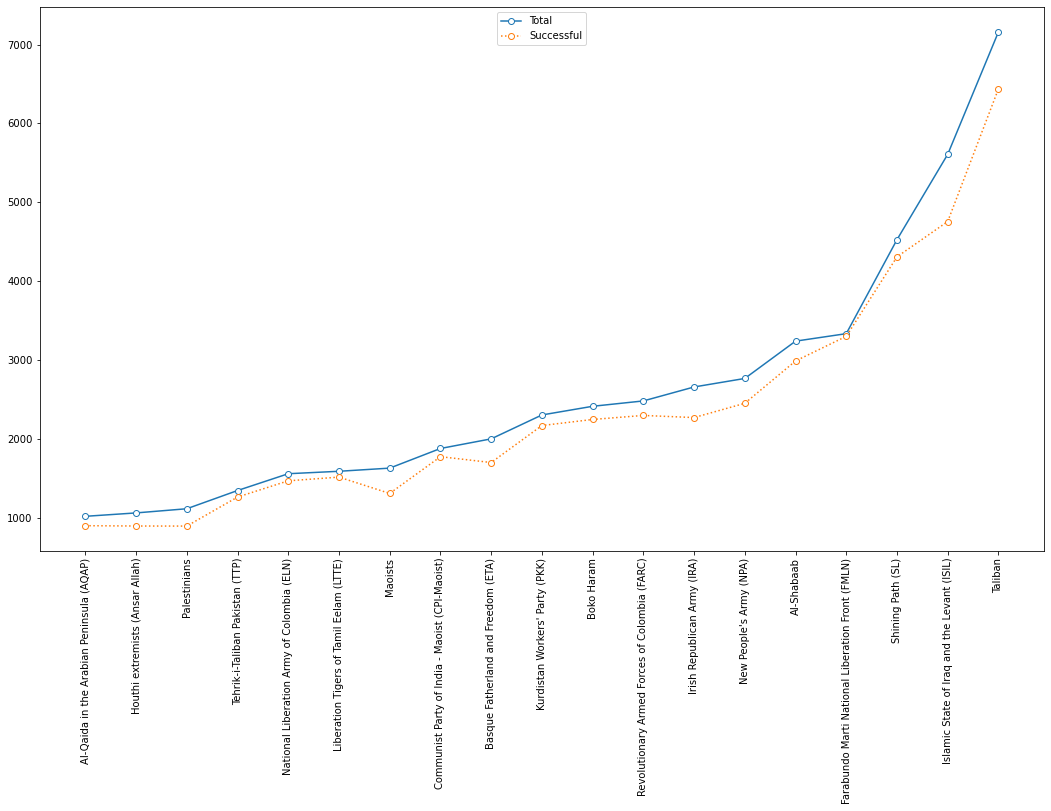

In [359]:
plt.figure(figsize=(18,10))
plt.plot(success_rate["Total"],marker='o',markerfacecolor = 'white')
plt.plot(success_rate["Successful"],linestyle=":",marker='o',markerfacecolor = 'white')
plt.xticks(rotation=90)
plt.legend(["Total","Successful"],loc="upper center")
plt.show()

